In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data=pd.read_csv(r"C:\Users\HP\Documents\Dataset\train.csv\train.csv")
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


# Data Preprocessing

### 1) Check descriptive statistics from the dataset.

In [3]:
# find the data type from the dataset.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
# find the some statistical information of the data.
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### 2) Find the missing values in the data.

In [5]:
# finding is any null or missing value present in dataset.
train_data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [6]:
# Finding how many null values present in the dataset.
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Result:-
#### i)Product_Category_2 & Product_Category_3 has missing values.
#### i) Product_Category_2 has 173638 missing values.
#### ii) Product_Category_3 has 383247 missing values.

### 3) Check how much unique values present in dataset.

In [7]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


#### Result:-

In [8]:
print("Unique values in User_ID is:  ",train_data["User_ID"].nunique())
print("Unique values are:  ",train_data["User_ID"].unique())

Unique values in User_ID is:   5891
Unique values are:   [1000001 1000002 1000003 ... 1004113 1005391 1001529]


In [9]:
print("Unique values in Product_ID is:  ",train_data["Product_ID"].nunique())
print("Unique values are:  ",train_data["Product_ID"].unique())

Unique values in Product_ID is:   3631
Unique values are:   ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']


In [10]:
print("Unique values in Gender is:  ",train_data["Gender"].nunique())
print("Unique values are:  ",train_data["Gender"].unique())

Unique values in Gender is:   2
Unique values are:   ['F' 'M']


In [11]:
print("Unique values in Age is:  ",train_data["Age"].nunique())
print("Unique values are:  ",train_data["Age"].unique())

Unique values in Age is:   7
Unique values are:   ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [12]:
print("Unique values in Occupation is:  ",train_data["Occupation"].nunique())
print("Unique values are:  ",train_data["Occupation"].unique())

Unique values in Occupation is:   21
Unique values are:   [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [13]:
print("Unique values in City_Category is:  ",train_data["City_Category"].nunique())
print("Unique values are:  ",train_data["City_Category"].unique())

Unique values in City_Category is:   3
Unique values are:   ['A' 'C' 'B']


In [14]:
print("Unique values in Stay_In_Current_City_Years is:  ",train_data["Stay_In_Current_City_Years"].nunique())
print("Unique values are:  ",train_data["Stay_In_Current_City_Years"].unique())

Unique values in Stay_In_Current_City_Years is:   5
Unique values are:   ['2' '4+' '3' '1' '0']


In [15]:
print("Unique values in Marital_Status is:  ",train_data["Marital_Status"].nunique())
print("Unique values are:  ",train_data["Marital_Status"].unique())

Unique values in Marital_Status is:   2
Unique values are:   [0 1]


In [16]:
print("Unique values in Product_Category_1 is:  ",train_data["Product_Category_1"].nunique())
print("Unique values are:  ",train_data["Product_Category_1"].unique())

Unique values in Product_Category_1 is:   20
Unique values are:   [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


In [17]:
print("Unique values in Product_Category_2 is:  ",train_data["Product_Category_2"].nunique())
print("Unique values are:  ",train_data["Product_Category_2"].unique())

Unique values in Product_Category_2 is:   17
Unique values are:   [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [18]:
print("Unique values in Product_Category_3 is:  ",train_data["Product_Category_3"].nunique())
print("Unique values are:  ",train_data["Product_Category_3"].unique())

Unique values in Product_Category_3 is:   15
Unique values are:   [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [19]:
print("Unique values in Purchase is:  ",train_data["Purchase"].nunique())
print("Unique values are:  ",train_data["Purchase"].unique())

Unique values in Purchase is:   18105
Unique values are:   [ 8370 15200  1422 ...   135   123   613]


### 4) Perform EDA (Exploratory Data Analysis)

In [20]:
# In EDA analysis we find out the how many null values present in data.
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [21]:
a=train_data["Product_Category_2"].mean()
b=train_data["Product_Category_3"].mean()
train_data["Product_Category_2"]=train_data["Product_Category_2"].fillna(a)
train_data["Product_Category_3"]=train_data["Product_Category_3"].fillna(b)

In [22]:
# In EDA analysis we find out the how many duplicate values present in data.
dup=train_data.duplicated().sum()
dup

0

In [23]:
# In EDA analysis we find out what is the mean,maximum and minimum value of the data.
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,2.271830,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [24]:
# In EDA analysis we find out the Correlation between the data.
cor=train_data.corr()
cor

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001267,0.001888,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000317,0.007265,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.012507,0.010695,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.373686,0.082711,-0.343703
Product_Category_2,0.001267,-0.000317,0.012507,0.373686,1.000000,0.320195,-0.179309
Product_Category_3,0.001888,0.007265,0.010695,0.082711,0.320195,1.000000,-0.012261
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.179309,-0.012261,1.000000


<AxesSubplot:>

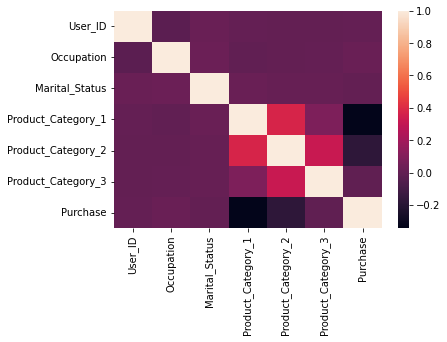

In [25]:
sns.heatmap(cor)

### Result:-
#### Above heatmap shows maximum columns has correlation between 0 to 0.4 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

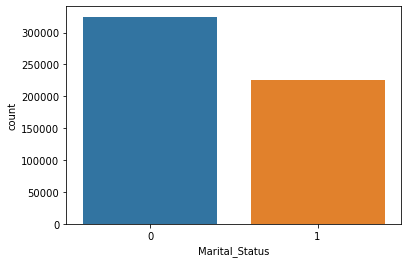

In [26]:
sns.countplot(train_data["Marital_Status"])

### Result:-
#### Above countplot shows count of  unmarried peoples are greater than the married peoples.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

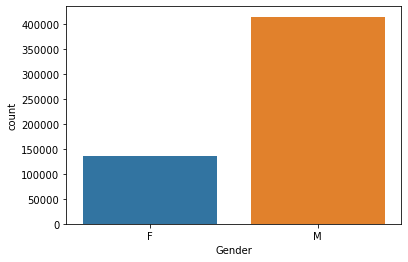

In [27]:
sns.countplot(train_data["Gender"])

### Result:-
#### Above countplot shows count of males are greater than females.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

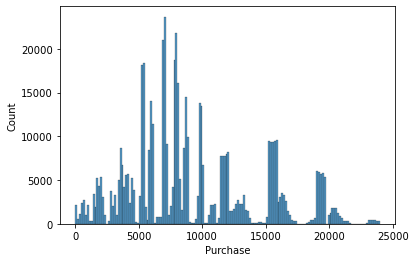

In [28]:
sns.histplot(x="Purchase",data=train_data)

### Result:-
#### Above histogram shows purchase between 5000 to 10000 is maximum.

## 5) Purchase Distribution with respect to other variables in the dataset.

In [29]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,12.668243,365


<AxesSubplot:xlabel='Gender', ylabel='Count'>

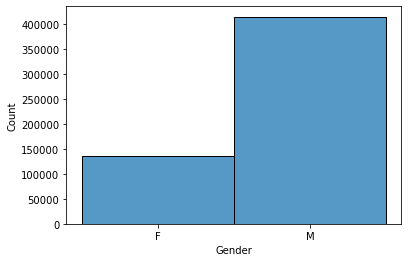

In [96]:
sns.histplot(x="Gender",data=train_data)
# Given data follows Bernoulli Distribution.

<AxesSubplot:xlabel='Age', ylabel='Count'>

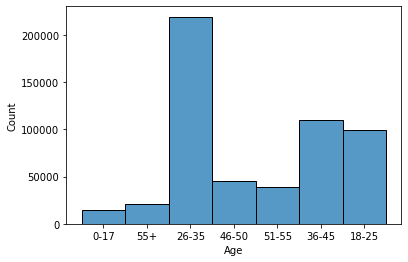

In [94]:
sns.histplot(x="Age",data=train_data)

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

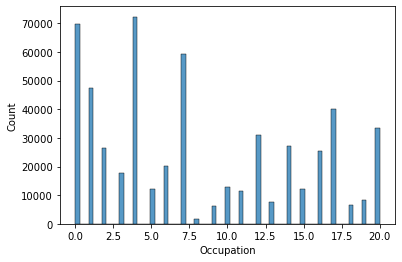

In [93]:
sns.histplot(x="Occupation",data=train_data)

<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

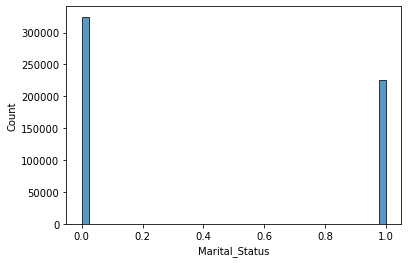

In [92]:
sns.histplot(x="Marital_Status",data=train_data)
# Given data follows Bernoulli Distribution.

### 6) check for outliers

<AxesSubplot:xlabel='Occupation'>

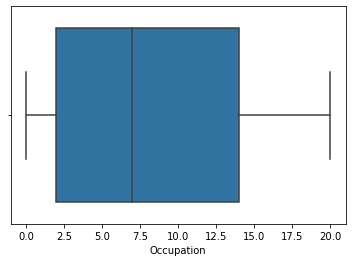

In [32]:
sns.boxplot(x=train_data["Occupation"])
# There is no outlier in the Occupation column.

<AxesSubplot:xlabel='Product_Category_1'>

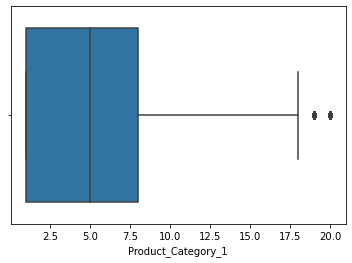

In [33]:
sns.boxplot(x=train_data["Product_Category_1"])
# Product_Category_1 column has outliers.

<AxesSubplot:xlabel='Product_Category_2'>

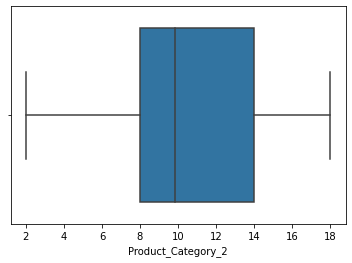

In [34]:
sns.boxplot(x=train_data["Product_Category_2"])
# Product_Category_2 does not have any outliers.

<AxesSubplot:xlabel='Purchase'>

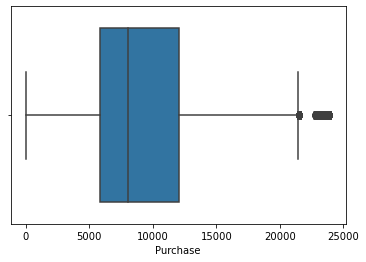

In [35]:
sns.boxplot(x=train_data["Purchase"])
# Purchase column has outliers.

### 7) Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc

In [36]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,12.668243,365


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

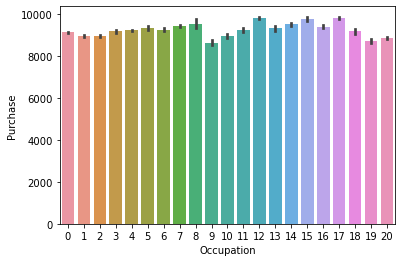

In [98]:
# Analysis on occupation and purchase column.
sns.barplot(train_data["Occupation"],train_data["Purchase"])

### 8) Drop unnecessary fields

In [37]:
del train_data["Product_ID"]
del train_data["User_ID"]

In [38]:
train_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,F,55+,1,C,2,0,20,9.842329,12.668243,365


### 9) Convert categorical data into integer using map function (e.g 'Gender' column)

In [39]:
train_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,F,55+,1,C,2,0,20,9.842329,12.668243,365


In [40]:
train_data["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [41]:
train_data["Gender"]=train_data["Gender"].map({"F":0,"M":1})
train_data["Age"]=train_data["Age"].map({"0-17":0,"18-25":1,"26-35":2,"36-45":3,"46-50":4,"51-55":5,"55+":6})
train_data["City_Category"]=train_data["City_Category"].map({"A":0,"B":1,"C":2})

In [42]:
train1=train_data
train1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1,6,16,2,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9.842329,12.668243,368
550064,0,2,1,2,3,0,20,9.842329,12.668243,371
550065,0,2,15,1,4+,1,20,9.842329,12.668243,137
550066,0,6,1,2,2,0,20,9.842329,12.668243,365


### 10) missing value treatment

In [43]:
train_data=pd.read_csv(r"C:\Users\HP\Documents\Dataset\train.csv\train.csv")
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


### i) Fill the null values by using mean:-

In [44]:
a=train_data["Product_Category_2"].mean()
b=train_data["Product_Category_3"].mean()
train_data["Product_Category_2"]=train_data["Product_Category_2"].fillna(a)
train_data["Product_Category_3"]=train_data["Product_Category_3"].fillna(b)

In [45]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,12.668243,365


### Result:-
#### Null values are filled by the column mean.

## 11) Rename columns

In [46]:
train1.rename(columns={"Gender":"sex","Occupation":"Profession","City_Category":"Address","Product_Category_1":"prod_1","Product_Category_2":"prod_2","Product_Category_3":"prod_3","Purchase":"Balance"},inplace=True)

In [47]:
train1.head(2)

,sex,Age,Profession,Address,Stay_In_Current_City_Years,Marital_Status,prod_1,prod_2,prod_3,Balance
0,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,0,0,10,0,2,0,1,6.000000,14.000000,15200


### 12)  Fill Nan values

In [48]:
#Fill the null values by using maximum value:-
train_data=pd.read_csv(r"C:\Users\HP\Documents\Dataset\train.csv\train.csv")
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [49]:
a=train_data["Product_Category_2"].max()
b=train_data["Product_Category_3"].max()
train_data["Product_Category_2"]=train_data["Product_Category_2"].fillna(a)
train_data["Product_Category_3"]=train_data["Product_Category_3"].fillna(b)

In [50]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,18.0,18.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,18.0,18.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,18.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,18.0,18.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,18.0,18.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,18.0,18.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,18.0,18.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,18.0,18.0,365


# Data Visualization

In [51]:
train1

,sex,Age,Profession,Address,Stay_In_Current_City_Years,Marital_Status,prod_1,prod_2,prod_3,Balance
0,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1,6,16,2,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9.842329,12.668243,368
550064,0,2,1,2,3,0,20,9.842329,12.668243,371
550065,0,2,15,1,4+,1,20,9.842329,12.668243,137
550066,0,6,1,2,2,0,20,9.842329,12.668243,365


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

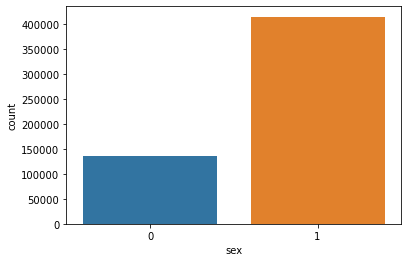

In [52]:
# Gender
sns.countplot(train1["sex"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

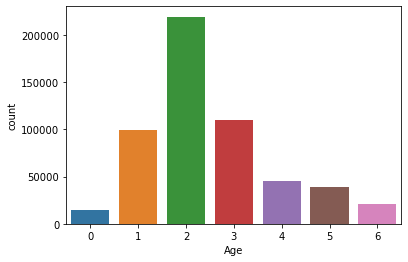

In [53]:
# AGE
sns.countplot(train1["Age"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

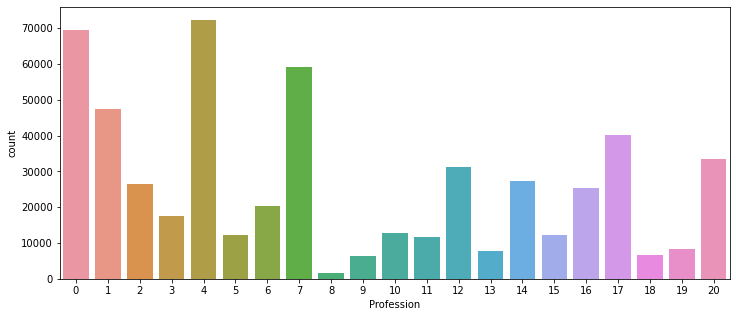

In [103]:
#Occupation
plt.figure(figsize=(12,5))
sns.countplot(train1["Profession"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Address', ylabel='count'>

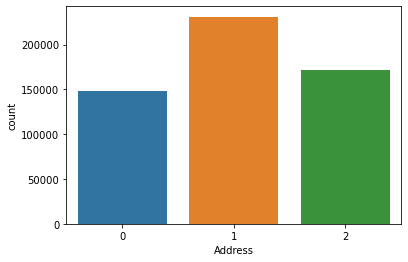

In [55]:
#City_Category
sns.countplot(train1["Address"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

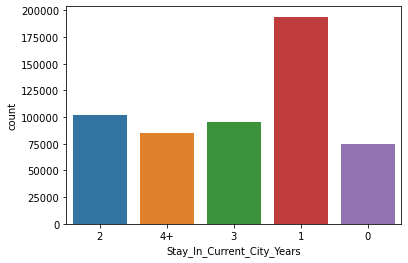

In [56]:
#Stay_In_Current_City_Years
sns.countplot(train1["Stay_In_Current_City_Years"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

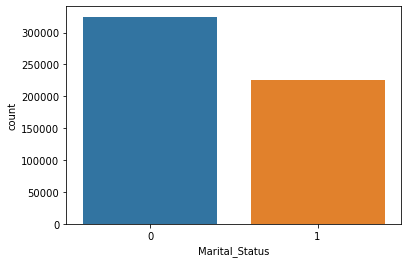

In [57]:
#Marital_Status
sns.countplot(train1["Marital_Status"])

<AxesSubplot:xlabel='prod_1', ylabel='Count'>

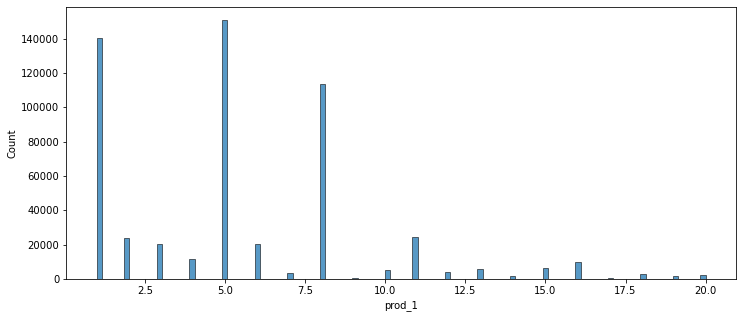

In [104]:
#Product_Category_1
plt.figure(figsize=(12,5))
sns.histplot(x="prod_1",data=train1)

<AxesSubplot:xlabel='prod_2', ylabel='Count'>

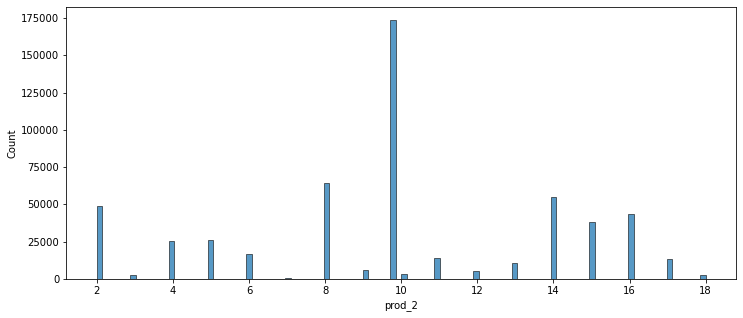

In [105]:
#Product_Category_2
plt.figure(figsize=(12,5))
sns.histplot(x="prod_2",data=train1)

<AxesSubplot:xlabel='prod_3', ylabel='Count'>

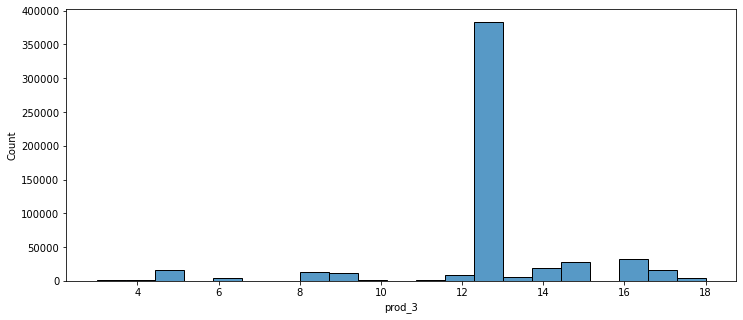

In [106]:
#Product_Category_3
plt.figure(figsize=(12,5))
sns.histplot(x="prod_3",data=train1)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

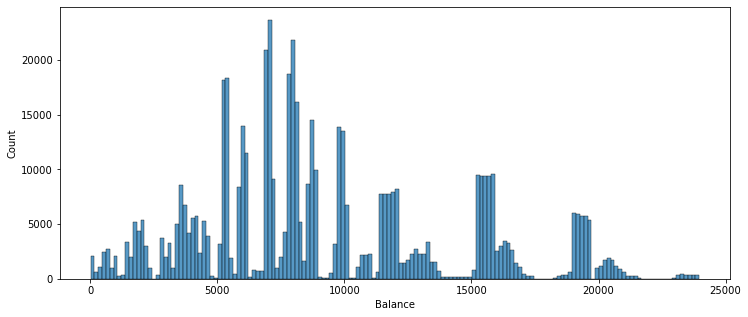

In [107]:
#Purchase
plt.figure(figsize=(12,5))
sns.histplot(x="Balance",data=train1)

### Age V/s Purchased

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Balance'>

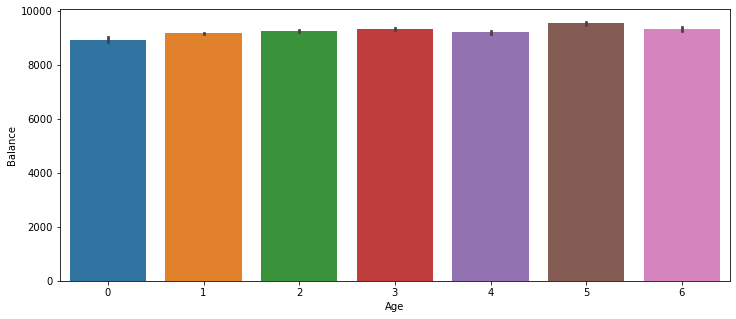

In [108]:
plt.figure(figsize=(12,5))
x=train1["Age"]
y=train1["Balance"]
sns.barplot(x,y)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='Balance'>

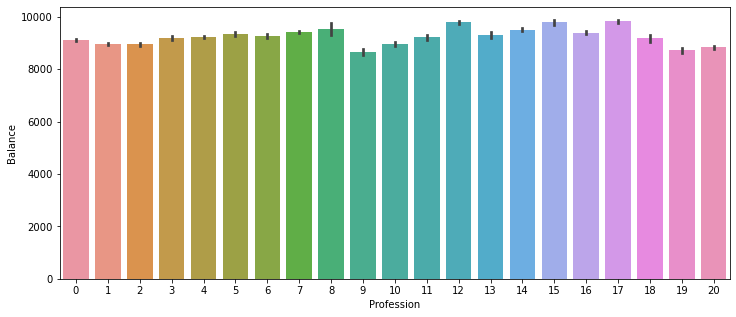

In [102]:
#Occupation v/s Purchase
plt.figure(figsize=(12,5))
x=train1["Profession"]
y=train1["Balance"]
sns.barplot(x,y)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_1', ylabel='Balance'>

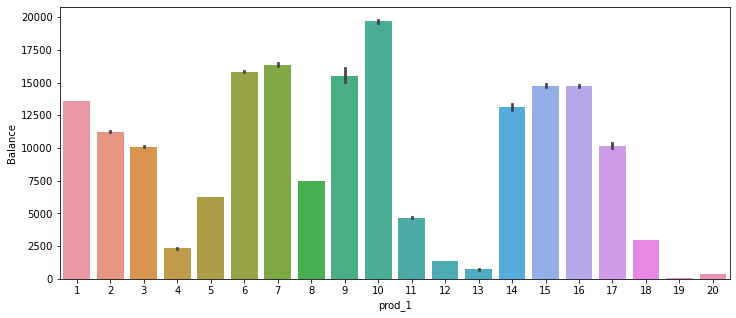

In [101]:
#Product_Category_1 v/s Purchase
plt.figure(figsize=(12,5))
x=train1["prod_1"]
y=train1["Balance"]
sns.barplot(x,y)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_2', ylabel='Balance'>

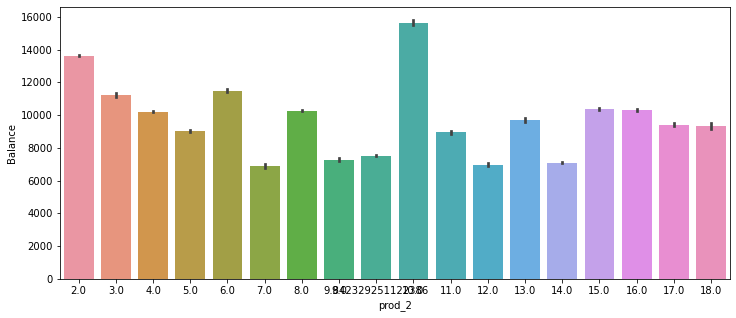

In [100]:
#Product_Category_2 v/s Purchase
plt.figure(figsize=(12,5))
x=train1["prod_2"]
y=train1["Balance"]
sns.barplot(x,y)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_3', ylabel='Balance'>

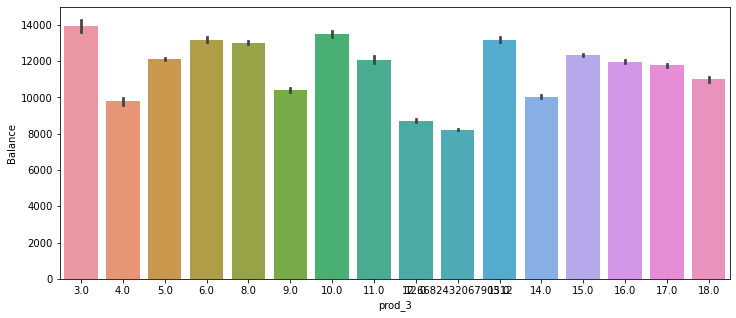

In [99]:
#Product_Category_3 v/s Purchase
plt.figure(figsize=(12,5))
x=train1["prod_3"]
y=train1["Balance"]
sns.barplot(x,y)

### Pie Chart of City Category

<AxesSubplot:ylabel='Address'>

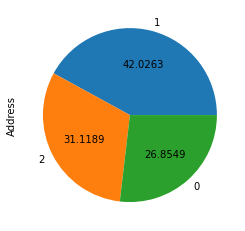

In [67]:
train1["Address"].value_counts().plot(kind="pie",autopct="%.4f")
#City B persons are more present in the data.

# check for more possible plots

<AxesSubplot:xlabel='sex', ylabel='count'>

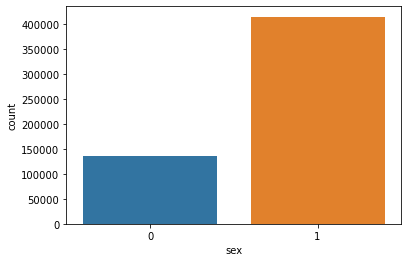

In [68]:
sns.countplot(x="sex",data=train1)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

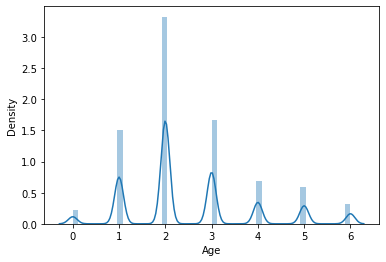

In [69]:
sns.distplot(train1["Age"]) 

### Result:-
#### It is follows normal distribution.

### Q.3 The company is looking to build a model that can predict how much a customer is likely to spend on a given product, which will enable them to tailor personalized offers to each customer for different products

In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [72]:
l1=LabelEncoder()
train1["Stay_In_Current_City_Years"]=l1.fit_transform(train1["Stay_In_Current_City_Years"])

In [73]:
#Training Data
train1

,sex,Age,Profession,Address,Stay_In_Current_City_Years,Marital_Status,prod_1,prod_2,prod_3,Balance
0,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1,6,16,2,4,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9.842329,12.668243,368
550064,0,2,1,2,3,0,20,9.842329,12.668243,371
550065,0,2,15,1,4,1,20,9.842329,12.668243,137
550066,0,6,1,2,2,0,20,9.842329,12.668243,365


### Now we need some preprocessing on our testing data to fit the model.

In [74]:
test=pd.read_csv(r"C:\Users\HP\Documents\Dataset\test.csv\test.csv")
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [75]:
del test["User_ID"]
del test["Product_ID"]

In [76]:
c=test["Product_Category_2"].mean()
d=test["Product_Category_3"].mean()
test["Product_Category_2"]=test["Product_Category_2"].fillna(c)
test["Product_Category_3"]=test["Product_Category_3"].fillna(d)

In [77]:
l1=LabelEncoder()
test["Gender"]=l1.fit_transform(test["Gender"])
test["Age"]=l1.fit_transform(test["Age"])
test["City_Category"]=l1.fit_transform(test["City_Category"])
test["Stay_In_Current_City_Years"]=l1.fit_transform(test["Stay_In_Current_City_Years"])

In [78]:
test.rename(columns={"Gender":"sex","Occupation":"Profession","City_Category":"Address","Product_Category_1":"prod_1","Product_Category_2":"prod_2","Product_Category_3":"prod_3","Purchase":"Balance"},inplace=True)

In [79]:
# Testing Dataset
test

,sex,Age,Profession,Address,Stay_In_Current_City_Years,Marital_Status,prod_1,prod_2,prod_3
0,1,4,7,1,2,1,1,11.000000,12.669454
1,1,2,17,2,0,0,3,5.000000,12.669454
2,0,3,1,1,4,1,5,14.000000,12.669454
3,0,3,1,1,4,1,4,9.000000,12.669454
4,0,2,1,2,1,0,4,5.000000,12.000000
...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,8,9.849586,12.669454
233595,0,2,15,1,4,1,5,8.000000,12.669454
233596,0,2,15,1,4,1,1,5.000000,12.000000
233597,0,4,1,2,4,0,10,16.000000,12.669454


In [80]:
# Now split the training data and testing data into X and Y for fitting the model.
x_train=train1.iloc[:,:-1]
y_train=test.iloc[:,:]
Y_train=train1.iloc[:,-1]

In [81]:
# Now use standard scaler to scale down the data who's value is high as compare to categorical data.
std=StandardScaler()
X_train=std.fit_transform(x_train)
X_test=std.fit_transform(y_train)

# Random Forest Regressor

In [86]:
# Now fit the appropriate model or algorithm.
RFR=RandomForestRegressor()
rfr=RFR.fit(X_train,Y_train)

In [87]:
Balance=RFR.predict(X_test)
print(Balance)

[18172.00785931 10673.58316667  8409.8125396  ... 13832.56166667
 22480.22666667  2216.32541558]


In [88]:
rfr.score(X_train,Y_train)

0.7825001637269551

### Result:-
#### For the given dataset Random Forest Regressor is to predict the Purchase.
#### Random Forest Regressor gives  Accuracy is 78.25%

### Gradient Boosting Regressor

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
gbr=GBR.fit(X_train,Y_train)
gbr

GradientBoostingRegressor()

In [114]:
Balance1=GBR.predict(X_test)
print(Balance1)

[13200.55861046 10204.66476639  6132.07158016 ... 12741.83613798
 18479.15724187  2667.58835157]


In [115]:
gbr.score(X_train,Y_train)

0.6480203953564845

### Result:-
#### For the given dataset Gradient Boosting Regressor is to predict the Purchase.
#### Gradient Boosting Regressor gives  Accuracy is 64.80%

### By comparison of this two model Random Forest Regressor gives the best prediction as well as Best accuracy.